In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [2]:
n = 7

In [3]:
inputs = keras.Input( shape = ( 32, 32, 3 ), name = 'input' )

identity = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same', activation = 'relu' )(inputs)
identity = layers.BatchNormalization()(identity)
identity = layers.Activation('relu')(identity)

# block 1
for _ in range( n ):
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same', strides = 2 )(identity)

In [4]:
# block 2
identity = layers.ZeroPadding2D( [ 0, 8 ], 'channels_first' )(identity)
for _ in range( n ):
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same', strides = 2 )(identity)

In [5]:
# block 3
identity = layers.ZeroPadding2D( [ 0, 16 ], 'channels_first' )(identity)
for _ in range( n ):
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ], padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same', strides = 2 )(identity)

In [6]:
output = layers.GlobalAveragePooling2D()(identity)
output = layers.Dense( 10, activation = 'softmax' )(output)

In [7]:
model = keras.Model( inputs = inputs, outputs = output, name = 'resnet' )
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
_____________________________________________________________________________________________

In [8]:
lr = 1e-3
BATCH_SIZE = 512
EPOCHS = 25
model_name = 'ResNet_44layes(25epochs)'

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical( y_train, 10 )
y_test = keras.utils.to_categorical( y_test, 10 )

model.compile( optimizer = keras.optimizers.RMSprop( lr, 0.9 ),
             loss = keras.losses.CategoricalCrossentropy( from_logits = True ),
              metrics = ['acc'])

170500096/170498071 [==============================] - 11s 0us/step


In [10]:
history = model.fit( x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = 0.2 )

79/79 [==============================] - 41s 520ms/step - loss: 2.2455 - acc: 0.2102 - val_loss: 2.3214 - val_acc: 0.1380
Epoch 2/25
79/79 [==============================] - 40s 502ms/step - loss: 2.1909 - acc: 0.2639 - val_loss: 2.3525 - val_acc: 0.0947
Epoch 3/25
79/79 [==============================] - 40s 502ms/step - loss: 2.1593 - acc: 0.2964 - val_loss: 2.3055 - val_acc: 0.1384
Epoch 4/25
79/79 [==============================] - 40s 502ms/step - loss: 2.1303 - acc: 0.3253 - val_loss: 2.3183 - val_acc: 0.1400
Epoch 5/25
79/79 [==============================] - 40s 501ms/step - loss: 2.1083 - acc: 0.3476 - val_loss: 2.1913 - val_acc: 0.2609
Epoch 6/25
79/79 [==============================] - 40s 501ms/step - loss: 2.0856 - acc: 0.3713 - val_loss: 2.3374 - val_acc: 0.1225
Epoch 7/25
79/79 [==============================] - 40s 502ms/step - loss: 2.0714 - acc: 0.3856 - val_loss: 2.1663 - val_acc: 0.2895
Epoch 8/25
79/79 [==============================] - 40s 503ms/step - loss: 2.058

In [11]:
evaluation = model.evaluate( x_test, y_test )
print( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )

313/313 [==============================] - 5s 16ms/step - loss: 2.1095 - acc: 0.3480
loss: 2.11, acc: 34.80%


In [12]:
model.save( model_name + '.h5' )

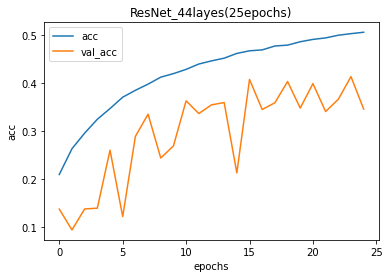

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )
plt.title( model_name )

plt.savefig(model_name + '.png')
plt.show()